In [1]:
import re
import networkx as nx

NUM_WORDS = 10

In [2]:
def get_words(counter_results):
    words = []
    for word, fre in counter_results:
        words.append(word)
    return words

In [3]:
def get_sentences(content):
    text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', content)
    text1 = re.sub(r'([\.\?\!])',r'\1 ', text1)
    text1 = text1.replace('\n','').replace('\t','').replace('\r','')
    sentences = re.split(r'[\.\?\!]\s+', text1)
    sentences = [komoran.nouns(sentence) for sentence in sentences if len(sentence)>0]
    return sentences

In [4]:
channel_lst =  ['인스타그램', '커뮤니티', '블로그', '뉴스', '트위터']
for i in channel_lst:
    with open(f'/home/hsung/text_mining/befobell_final_text_data/벤포벨_{i}.txt', 'r', encoding='utf8') as p:
        globals()['df_{}'.format(i)] = p.read()
 

In [5]:
#df_인스타그램

In [6]:
stopwords = ['가탄', '태전동', '칠곡','장영실', '에디슨','양제', '보드게임','하하호호', '지금',
             '실버','로나', '골드','우루사','오늘', '그램', '우리', '차이', '그램',  '하나', '일동제약', '김혜윤', '강동호'
             '박카스', '이진혁',' 공진단', '세라', '진짜','주년''문재인', '대통령','시우민', '우루사', '비콤','마멜공쥬',
            '현미', '곤약', '밥', '고구마', '치즈', '롤', '스테이크', '물', '물', '컵','띵가띵', '놀고잇엇어','길용우', '배우', '까스', '명수',
            '자가', '키트', '코로나', '와인', '모주', '코스피', '종목', '일동', '전속계약', '오윤수', '씨앤코', '전속계약', 
             '김규리', '최', '희서', '한솥', '밥', '배우', '조우진', '포벨', '종근당', '임팩타민', '아시', '비타민']

In [7]:
from kornounextractor.noun_extractor import extract

In [8]:
# with open('dic.txt', 'w', encoding='utf8') as f:
#     for word in sorted(extract(content, freq=2)):
#         f.write(word+'\tNNG\n')

In [9]:
import konlpy.tag
#komoran = konlpy.tag.Komoran(userdic='dic.txt')

komoran = konlpy.tag.Komoran()

In [10]:
noun_instagram = komoran.nouns(df_인스타그램)
noun_community = komoran.nouns(df_커뮤니티)
noun_blog = komoran.nouns(df_블로그)
noun_news = komoran.nouns(df_뉴스)
noun_twitter = komoran.nouns(df_트위터)

In [11]:
# print(noun_instagram)
# print(noun_community)
# print(noun_blog)

In [12]:
# final_nouns_blog= noun_blog.copy()
# unique_nouns_blog= set(noun_blog)
# for word in unique_nouns_blog:
#     if len(word) == 1: # 1음절 단어 제거하기
#         while word in final_nouns_blog:
#             final_nouns_blog.remove(word)
#     if word in stopwords:
#         while word in final_nouns_blog:
#             final_nouns_blog.remove(word)

In [13]:
noun_lst = [noun_instagram, noun_community, noun_blog, noun_news, noun_twitter]
for t in noun_lst:
    globals()['final_{}'.format(t)] = t.copy()
    globals()['unique_{}'.format(t)] = set(t)
    


            
#1 인스타그램
final_nouns_instagram = noun_instagram.copy()
unique_nouns_instagram = set(noun_instagram)
for word in unique_nouns_instagram:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_nouns_instagram:
            final_nouns_instagram.remove(word)
    if word in stopwords:
        while word in final_nouns_instagram:
            final_nouns_instagram.remove(word)
            
# #2 커뮤니티
final_nouns_community = noun_community.copy()
unique_nouns_community = set(noun_community)
for word in unique_nouns_community:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_nouns_community:
            final_nouns_community.remove(word)
    if word in stopwords:
        while word in final_nouns_community:
            final_nouns_community.remove(word)
            
# #3 블로그
final_nouns_blog= noun_blog.copy()
unique_nouns_blog= set(noun_blog)
for word in unique_nouns_blog:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_nouns_blog:
            final_nouns_blog.remove(word)
    if word in stopwords:
        while word in final_nouns_blog:
            final_nouns_blog.remove(word)

#4 뉴스
final_noun_news= noun_news.copy()
unique_noun_news= set(noun_news)
for word in unique_noun_news:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_noun_news:
            final_noun_news.remove(word)
    if word in stopwords:
        while word in final_noun_news:
            final_noun_news.remove(word)

#5 트위터
final_noun_twitter= noun_twitter.copy()
unique_noun_twitter= set(noun_news)
for word in unique_noun_twitter:
    if len(word) == 1: # 1음절 단어 제거하기
        while word in final_noun_twitter:
            final_noun_twitter.remove(word)
    if word in stopwords:
        while word in final_noun_twitter:
            final_noun_twitter.remove(word)

In [14]:
#print(final_noun)

In [15]:
from collections import Counter

insta = Counter(final_nouns_instagram)
community = Counter(final_nouns_community)
blog = Counter(final_nouns_blog)
news = Counter(final_noun_news)
twitter = Counter(final_noun_twitter)

In [16]:
insta.most_common(10)

[('피로', 110),
 ('약국', 63),
 ('함량', 57),
 ('건강', 54),
 ('영양제', 50),
 ('활성', 45),
 ('피곤', 45),
 ('요즘', 41),
 ('선물', 40),
 ('추천', 33)]

In [17]:
community.most_common(10)

[('영양제', 85),
 ('약국', 59),
 ('추천', 37),
 ('맥스', 31),
 ('피로', 20),
 ('가격', 17),
 ('신분', 17),
 ('종합', 12),
 ('부탁', 12),
 ('약사', 12)]

In [18]:
blog.most_common(10)

[('약국', 233),
 ('함량', 113),
 ('피로', 111),
 ('활성', 86),
 ('영양제', 86),
 ('맥스', 81),
 ('종합', 66),
 ('메타', 56),
 ('기능', 44),
 ('추천', 42)]

In [19]:
news.most_common(10)

[('활성', 163),
 ('함량', 141),
 ('피로', 84),
 ('하루', 69),
 ('기능', 67),
 ('해소', 48),
 ('건강', 42),
 ('명절', 39),
 ('건강관리', 31),
 ('증후군', 31)]

In [20]:
twitter.most_common(10)

[('음식', 352),
 ('테스트', 352),
 ('추석', 351),
 ('결과', 350),
 ('피곤', 347),
 ('매뉴얼', 109),
 ('산적', 107),
 ('꼬치', 106),
 ('사람', 72),
 ('생각', 71)]

In [21]:
insta_selected_words = get_words(insta.most_common(NUM_WORDS))
community_selected_words = get_words(community.most_common(NUM_WORDS))
blog_selected_words = get_words(blog.most_common(NUM_WORDS))
news_selected_words = get_words(news.most_common(NUM_WORDS))
twitter_selected_words = get_words(twitter.most_common(NUM_WORDS))


In [22]:
insta_selected_words


['피로', '약국', '함량', '건강', '영양제', '활성', '피곤', '요즘', '선물', '추천']

In [23]:
community_selected_words

['영양제', '약국', '추천', '맥스', '피로', '가격', '신분', '종합', '부탁', '약사']

In [24]:
blog_selected_words

['약국', '함량', '피로', '활성', '영양제', '맥스', '종합', '메타', '기능', '추천']

In [25]:
news_selected_words

['활성', '함량', '피로', '하루', '기능', '해소', '건강', '명절', '건강관리', '증후군']

In [26]:
twitter_selected_words

['음식', '테스트', '추석', '결과', '피곤', '매뉴얼', '산적', '꼬치', '사람', '생각']

In [27]:
#selected_words = ['교황', '한반도', '북한', '영국', '독일'] # You can selected a list of words based on other criterion
# selected_words

In [28]:
from Kr_sna import do_sna


insta_sentences = get_sentences(df_인스타그램)
community_sentences = get_sentences(df_커뮤니티)

In [29]:
blog_sentences = get_sentences(df_블로그)

In [30]:
news_sentences = get_sentences(df_뉴스)

In [31]:
twitter_sentences = get_sentences(df_트위터)

In [32]:
#sentences = get_sentences(content)
insta_final = do_sna(insta_sentences, insta_selected_words)
community_final = do_sna(community_sentences, community_selected_words)
blog_final = do_sna(blog_sentences, blog_selected_words)
news_final = do_sna(news_sentences, news_selected_words)
twitter_final = do_sna(twitter_sentences, twitter_selected_words)

In [33]:
insta_final.nodes()

NodeView(('피로', '약국', '함량', '건강', '영양제', '활성', '피곤', '요즘', '선물', '추천'))

In [34]:
community_final.nodes()

NodeView(('영양제', '약국', '추천', '맥스', '피로', '가격', '신분', '종합', '부탁', '약사'))

In [35]:
blog_final.nodes()

NodeView(('약국', '함량', '피로', '활성', '영양제', '맥스', '종합', '메타', '기능', '추천'))

In [36]:
news_final.nodes()

NodeView(('활성', '함량', '피로', '하루', '기능', '해소', '건강', '명절', '건강관리', '증후군'))

In [37]:
twitter_final.nodes()

NodeView(('음식', '테스트', '추석', '결과', '피곤', '매뉴얼', '산적', '꼬치', '사람', '생각'))

In [38]:
#g.nodes()

In [39]:
insta_final['피로']

AtlasView({'영양제': {'weight': 9}, '요즘': {'weight': 6}, '함량': {'weight': 16}, '건강': {'weight': 5}, '활성': {'weight': 13}, '피곤': {'weight': 9}, '추천': {'weight': 7}, '선물': {'weight': 6}, '약국': {'weight': 3}})

In [40]:
community_final['영양제']

AtlasView({'추천': {'weight': 15}, '약국': {'weight': 19}, '부탁': {'weight': 4}, '맥스': {'weight': 8}, '종합': {'weight': 3}, '피로': {'weight': 4}, '약사': {'weight': 4}, '가격': {'weight': 5}, '신분': {'weight': 1}})

In [41]:
blog_final['약국']

AtlasView({'함량': {'weight': 37}, '기능': {'weight': 14}, '추천': {'weight': 22}, '피로': {'weight': 36}, '영양제': {'weight': 44}, '종합': {'weight': 30}, '활성': {'weight': 29}, '맥스': {'weight': 32}, '메타': {'weight': 21}})

In [42]:
news_final['피로']

AtlasView({'해소': {'weight': 14}, '함량': {'weight': 19}, '건강관리': {'weight': 10}, '기능': {'weight': 16}, '하루': {'weight': 18}, '건강': {'weight': 13}, '활성': {'weight': 19}, '명절': {'weight': 9}, '증후군': {'weight': 9}})

In [43]:
twitter_final['음식']

AtlasView({'피곤': {'weight': 338}, '사람': {'weight': 69}, '결과': {'weight': 350}, '테스트': {'weight': 351}, '추석': {'weight': 351}, '꼬치': {'weight': 106}, '매뉴얼': {'weight': 109}, '산적': {'weight': 106}, '생각': {'weight': 67}})

In [49]:
nx.write_graphml(twitter_final, 'benfobell_twitter.graphml')

In [47]:
x = nx.degree_centrality(g)
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('비타민', 1.0),
 ('피로', 1.0),
 ('약국', 1.0),
 ('함량', 1.0),
 ('영양제', 1.0),
 ('피곤', 1.0),
 ('선물', 1.0),
 ('건강', 0.8888888888888888),
 ('요즘', 0.8888888888888888),
 ('활성', 0.7777777777777777)]

In [48]:
x = nx.closeness_centrality(g)
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('비타민', 1.0),
 ('피로', 1.0),
 ('약국', 1.0),
 ('함량', 1.0),
 ('영양제', 1.0),
 ('피곤', 1.0),
 ('선물', 1.0),
 ('건강', 0.9),
 ('요즘', 0.9),
 ('활성', 0.8181818181818182)]

In [49]:
x = nx.betweenness_centrality(g)
sorted(x.items(), key=lambda kv: kv[1], reverse=True)

[('비타민', 0.007936507936507936),
 ('피로', 0.007936507936507936),
 ('약국', 0.007936507936507936),
 ('함량', 0.007936507936507936),
 ('영양제', 0.007936507936507936),
 ('피곤', 0.007936507936507936),
 ('선물', 0.007936507936507936),
 ('건강', 0.0),
 ('활성', 0.0),
 ('요즘', 0.0)]

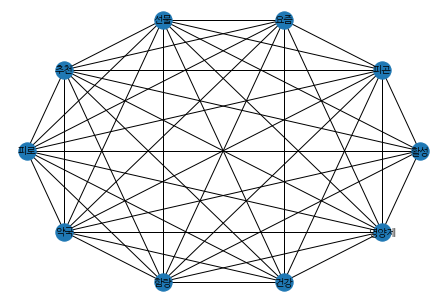

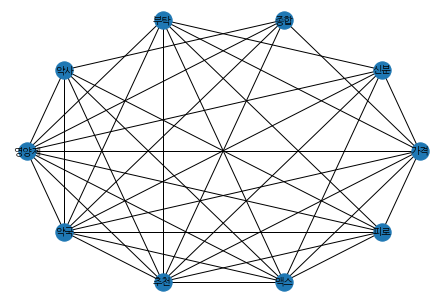

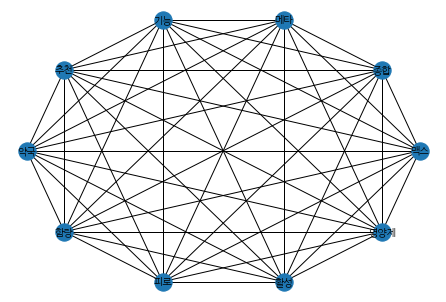

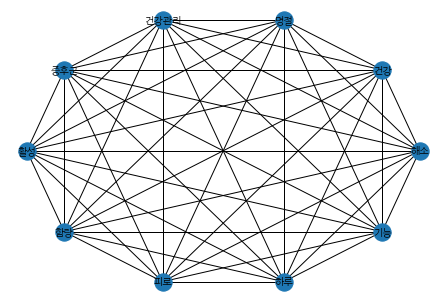

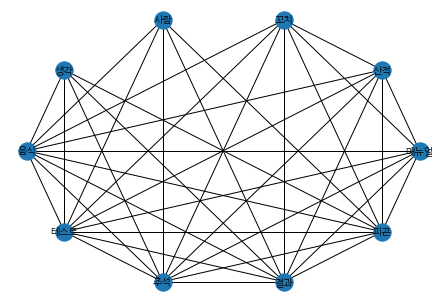

In [106]:
import matplotlib.pyplot as plt
font_name = 'NanumGothic'
final_list = [insta_final,community_final,blog_final, news_final, twitter_final]
for i in final_list:
    pos=nx.shell_layout(i)
    nx.draw(i, pos)
    nx.draw_networkx_labels(i, pos, font_family=font_name, font_size=10)
    plt.show()